# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 2: Simple Pendulum
## 02.19.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats

In [2]:
sns.set_style(style='whitegrid')

In [136]:
# -------- PRIMARY PARAMETERS --------
# Length of pendulum L
L = 1.5
# Damping coefficient q
q = 0
# Driving frequencey Omega_D
Omega_D = 0
# Driving amplitude F_D
F_D = 0
# Theta(0)
theta = 80
theta *= np.pi/180
# Omega(ω)
omega = 0
# Integration time t_max
t_max = 20
# Stepsize
dt = 0.1


# -------- OTHERS --------
# Accuracy
accuracy = 1e-6

In [137]:
def mode_choose(linearity, mode):
    
    current_mode = ('..\Release\pendulum.exe ' +
                      linearity + ' ' +
                      mode + ' ' +
                      str(L) + ' ' +
                      str(q) + ' ' +
                      str(Omega_D) + ' ' +
                      str(F_D) + ' ' +
                      str(theta) + ' ' +
                      str(omega) + ' ' +
                      str(t_max) + ' ' +
                      str(dt) + ' ' +
                      str(accuracy)
                     )
    
    return(current_mode)

In [138]:
linearity = 'nonlinear'

mode_runge = mode_choose(linearity, mode='runge')
mode_karp = mode_choose(linearity, mode='karp')
mode_euler = mode_choose(linearity, mode='euler')
mode_cromer = mode_choose(linearity, mode='cromer')

In [139]:
os.system(mode_runge)
data_runge = np.genfromtxt('pendulum.dat')

os.system(mode_karp)
data_karp = np.genfromtxt('pendulum.dat')

os.system(mode_euler)
data_euler = np.genfromtxt('pendulum.dat')

os.system(mode_cromer)
data_cromer = np.genfromtxt('pendulum.dat')

In [140]:
steps = 1
image_dpi = 150
image_format = 'pdf'

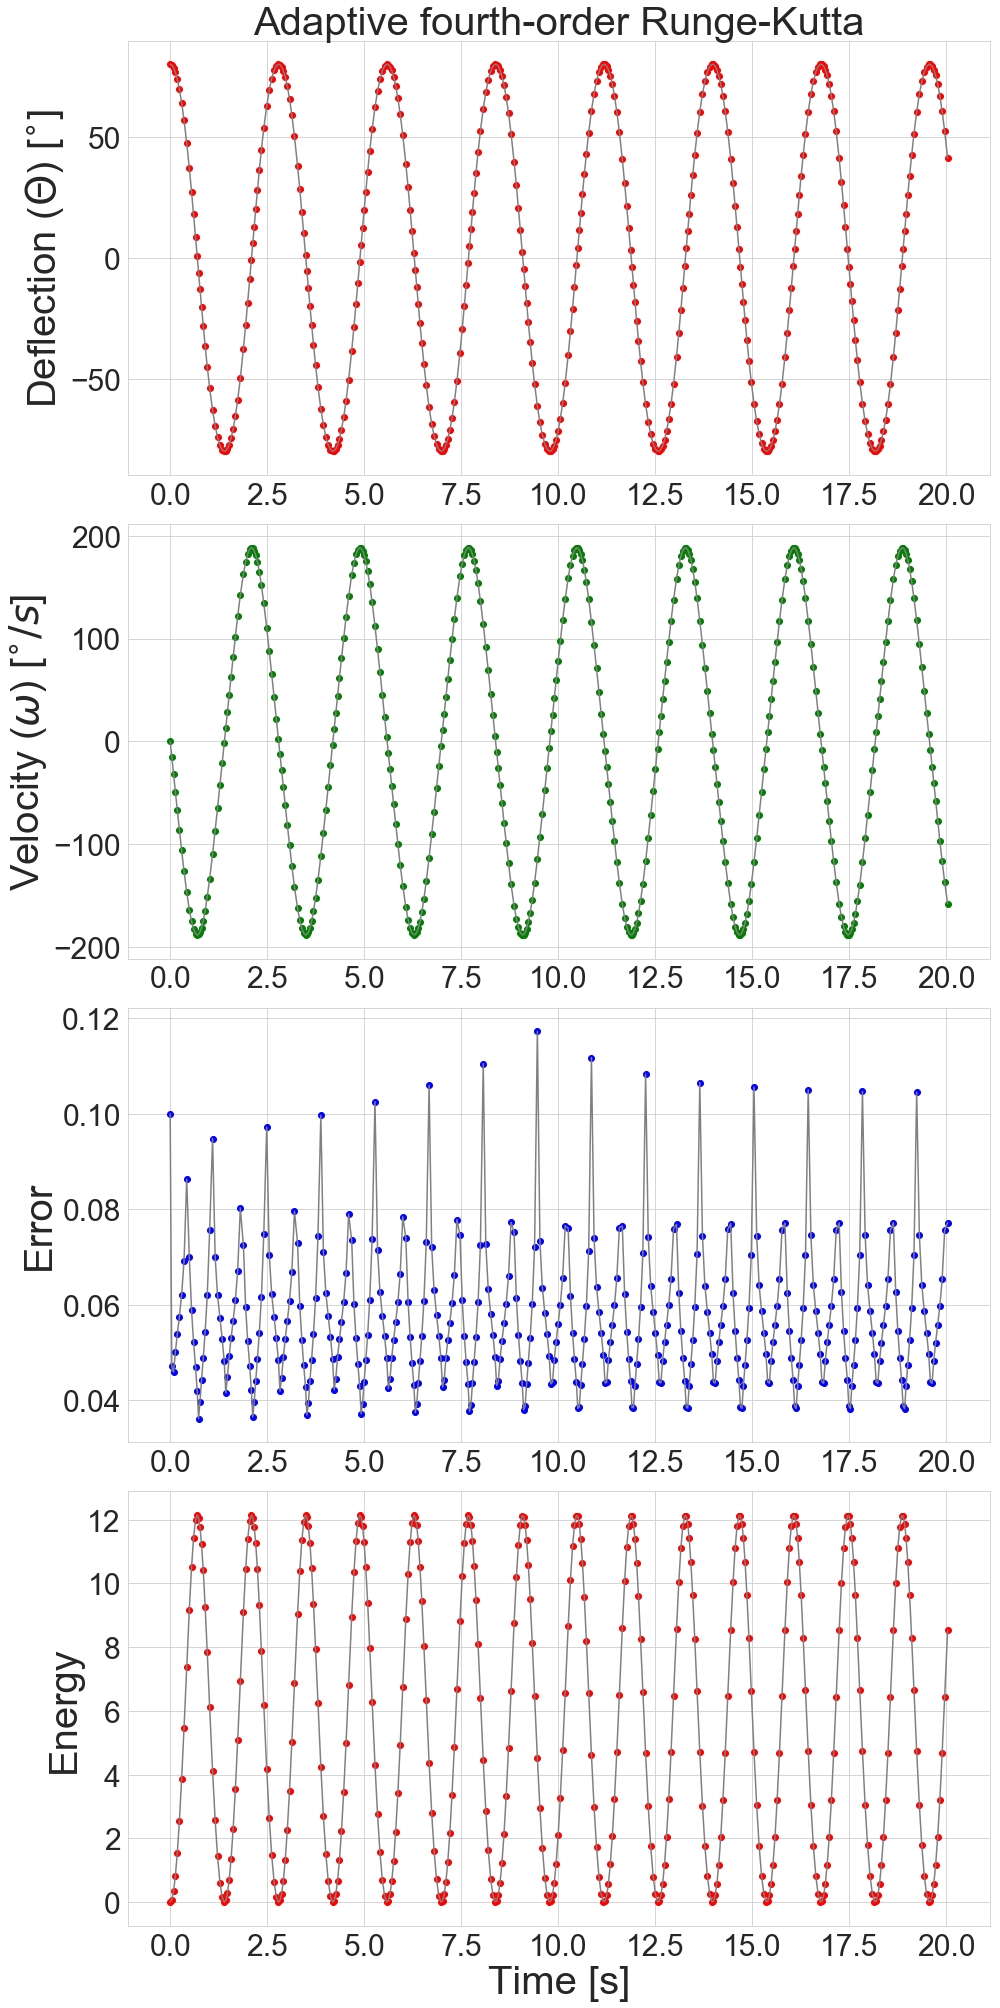

In [141]:
nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_runge[::steps,0], data_runge[::steps,1]*180/np.pi, color='grey')
axes[1].plot(data_runge[::steps,0], data_runge[::steps,2]*180/np.pi, color='grey')
axes[2].plot(data_runge[::steps,0], data_runge[::steps,3], color='grey')
axes[3].plot(data_runge[::steps,0], data_runge[::steps,4], color='grey')

axes[0].scatter(data_runge[::steps,0], data_runge[::steps,1]*180/np.pi, color='red')
axes[1].scatter(data_runge[::steps,0], data_runge[::steps,2]*180/np.pi, color='green')
axes[2].scatter(data_runge[::steps,0], data_runge[::steps,3], color='blue')
axes[3].scatter(data_runge[::steps,0], data_runge[::steps,4], color='orange')

axes[0].set_title('Adaptive fourth-order Runge-Kutta', fontsize=40)

axes[3].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$^{\circ}$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$^{\circ}/s$]', fontsize=40)
axes[2].set_ylabel('Error', fontsize=40)
axes[3].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)
axes[3].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_runge.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

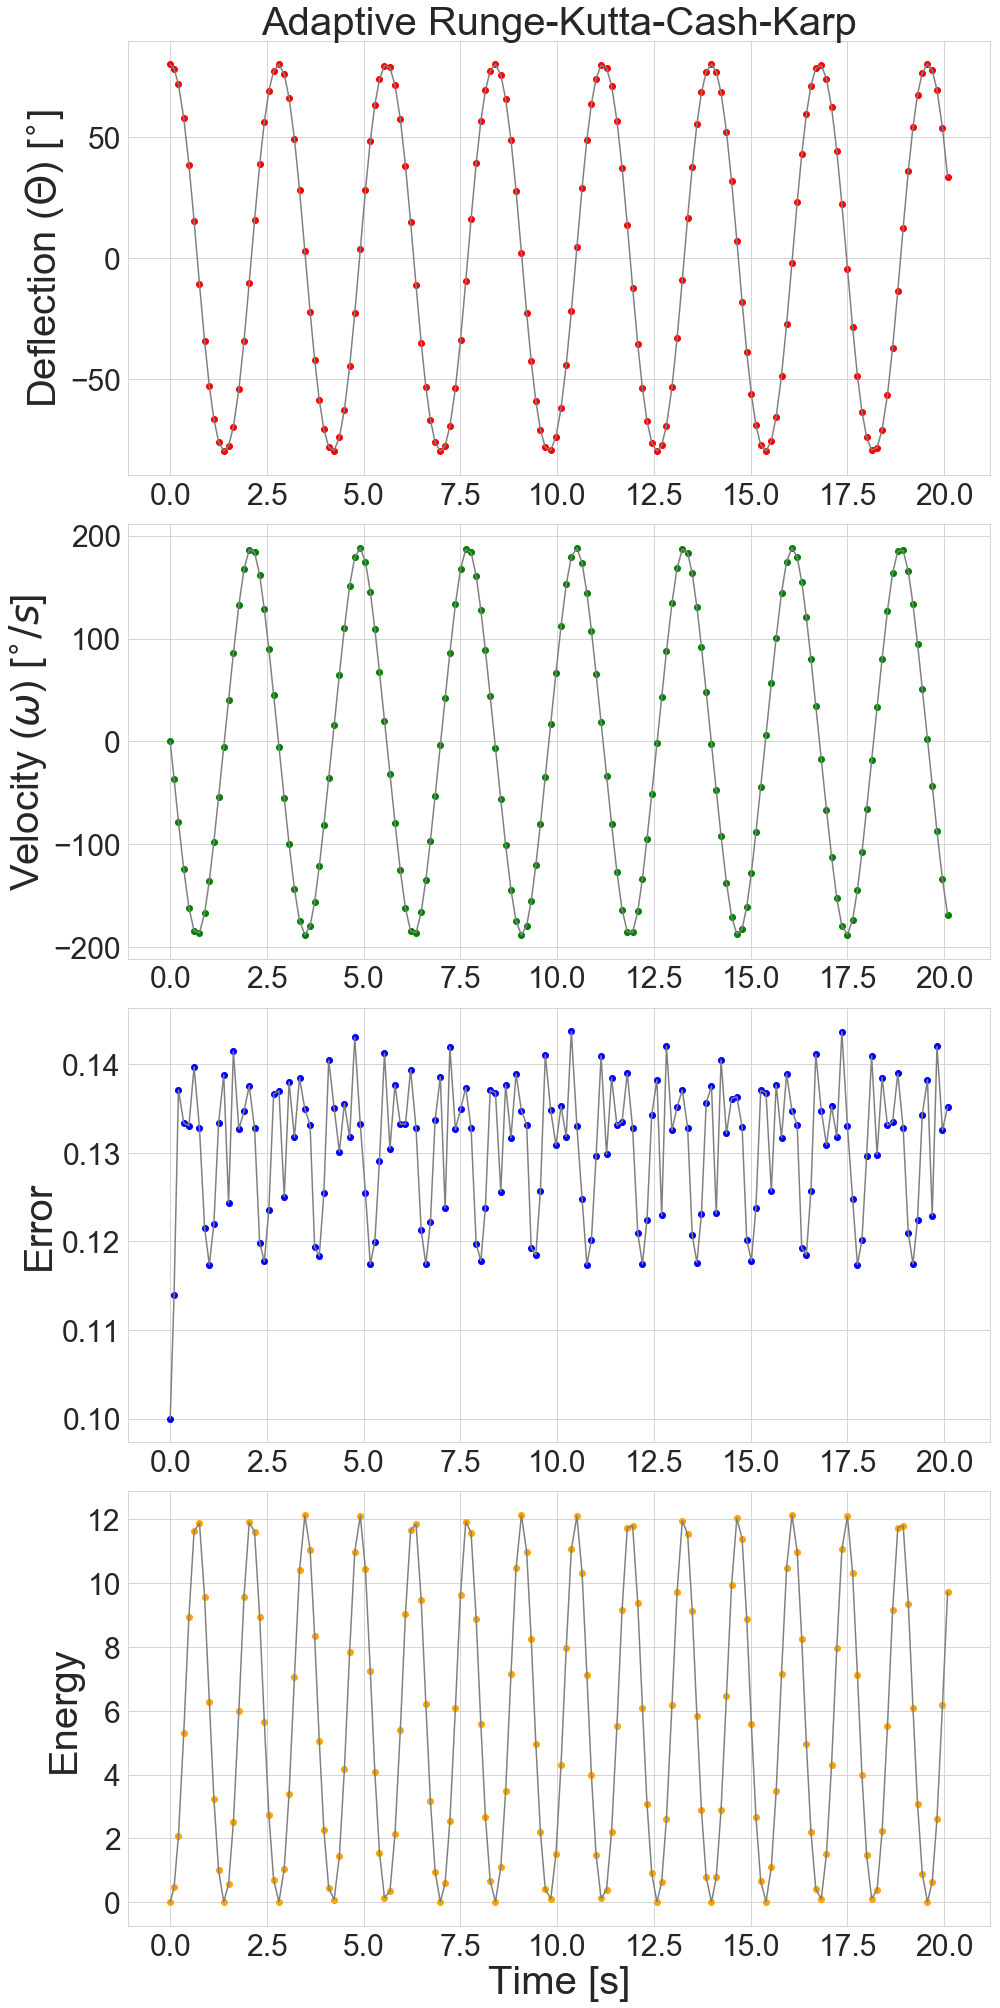

In [143]:
nrows = 4
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_karp[::steps,0], data_karp[::steps,1]*180/np.pi, color='grey')
axes[1].plot(data_karp[::steps,0], data_karp[::steps,2]*180/np.pi, color='grey')
axes[2].plot(data_karp[::steps,0], data_karp[::steps,3], color='grey')
axes[3].plot(data_karp[::steps,0], data_karp[::steps,4], color='grey')

axes[0].scatter(data_karp[::steps,0], data_karp[::steps,1]*180/np.pi, color='red')
axes[1].scatter(data_karp[::steps,0], data_karp[::steps,2]*180/np.pi, color='green')
axes[2].scatter(data_karp[::steps,0], data_karp[::steps,3], color='blue')
axes[3].scatter(data_karp[::steps,0], data_karp[::steps,4], color='orange')

axes[0].set_title('Adaptive Runge-Kutta-Cash-Karp', fontsize=40)

axes[3].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$^{\circ}$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$^{\circ}/s$]', fontsize=40)
axes[2].set_ylabel('Error', fontsize=40)
axes[3].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)
axes[3].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_karp.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

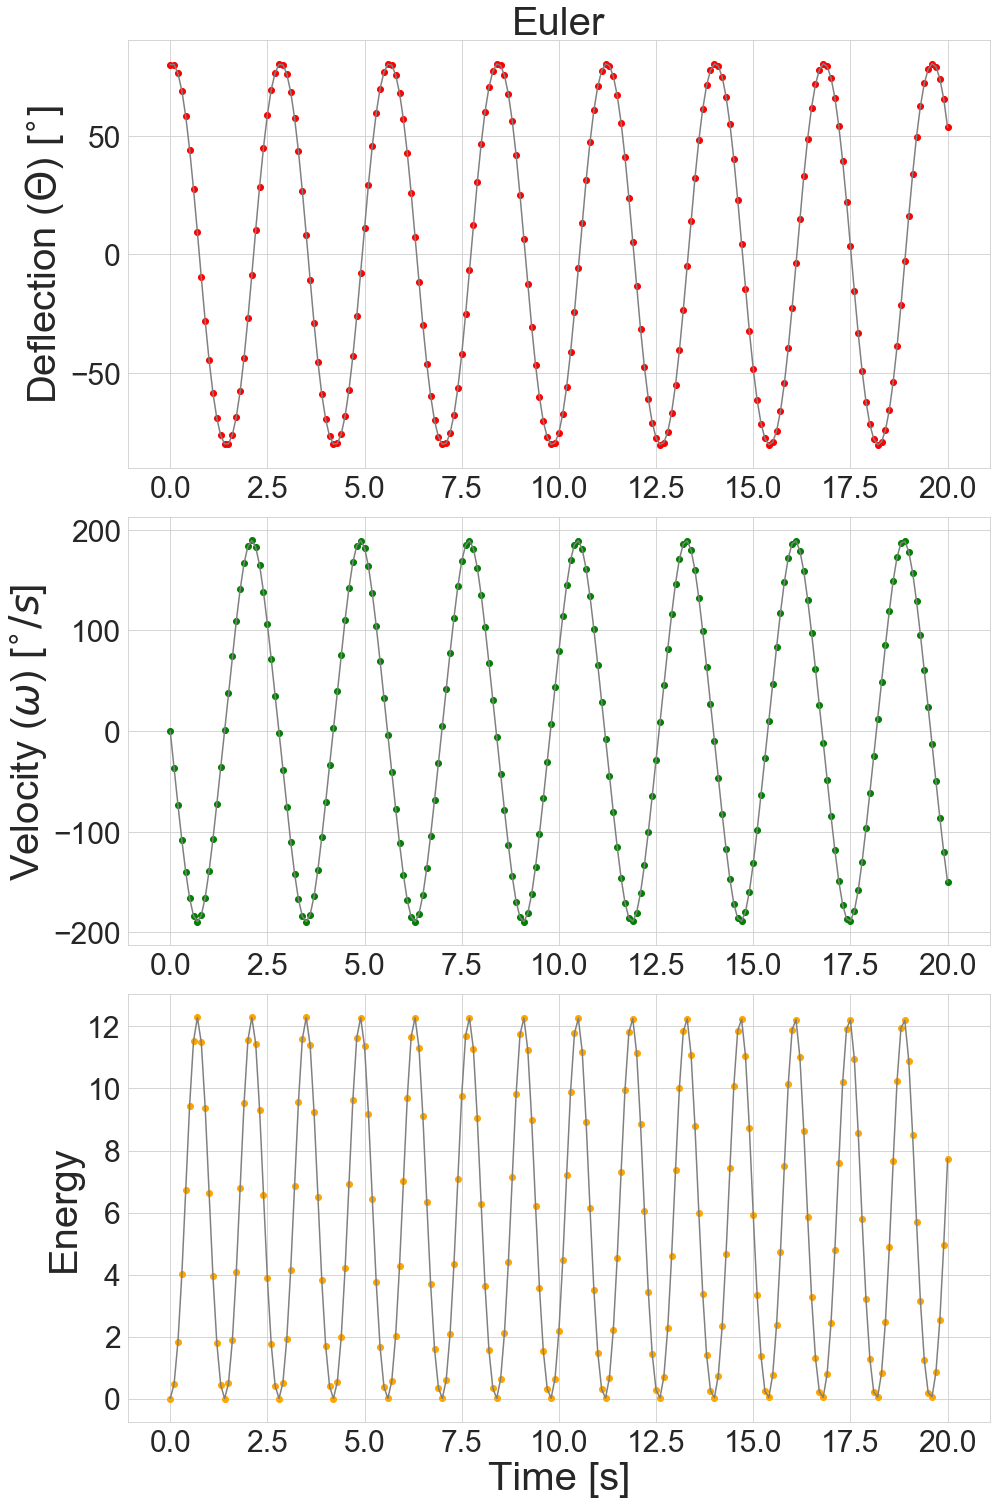

In [144]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_euler[::steps,0], data_euler[::steps,1]*180/np.pi, color='grey')
axes[1].plot(data_euler[::steps,0], data_euler[::steps,2]*180/np.pi, color='grey')
axes[2].plot(data_euler[::steps,0], data_euler[::steps,4], color='grey')

axes[0].scatter(data_euler[::steps,0], data_euler[::steps,1]*180/np.pi, color='red')
axes[1].scatter(data_euler[::steps,0], data_euler[::steps,2]*180/np.pi, color='green')
axes[2].scatter(data_euler[::steps,0], data_euler[::steps,4], color='orange')

axes[0].set_title('Euler', fontsize=40)

axes[2].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$^{\circ}$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$^{\circ}/s$]', fontsize=40)
axes[2].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_euler.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

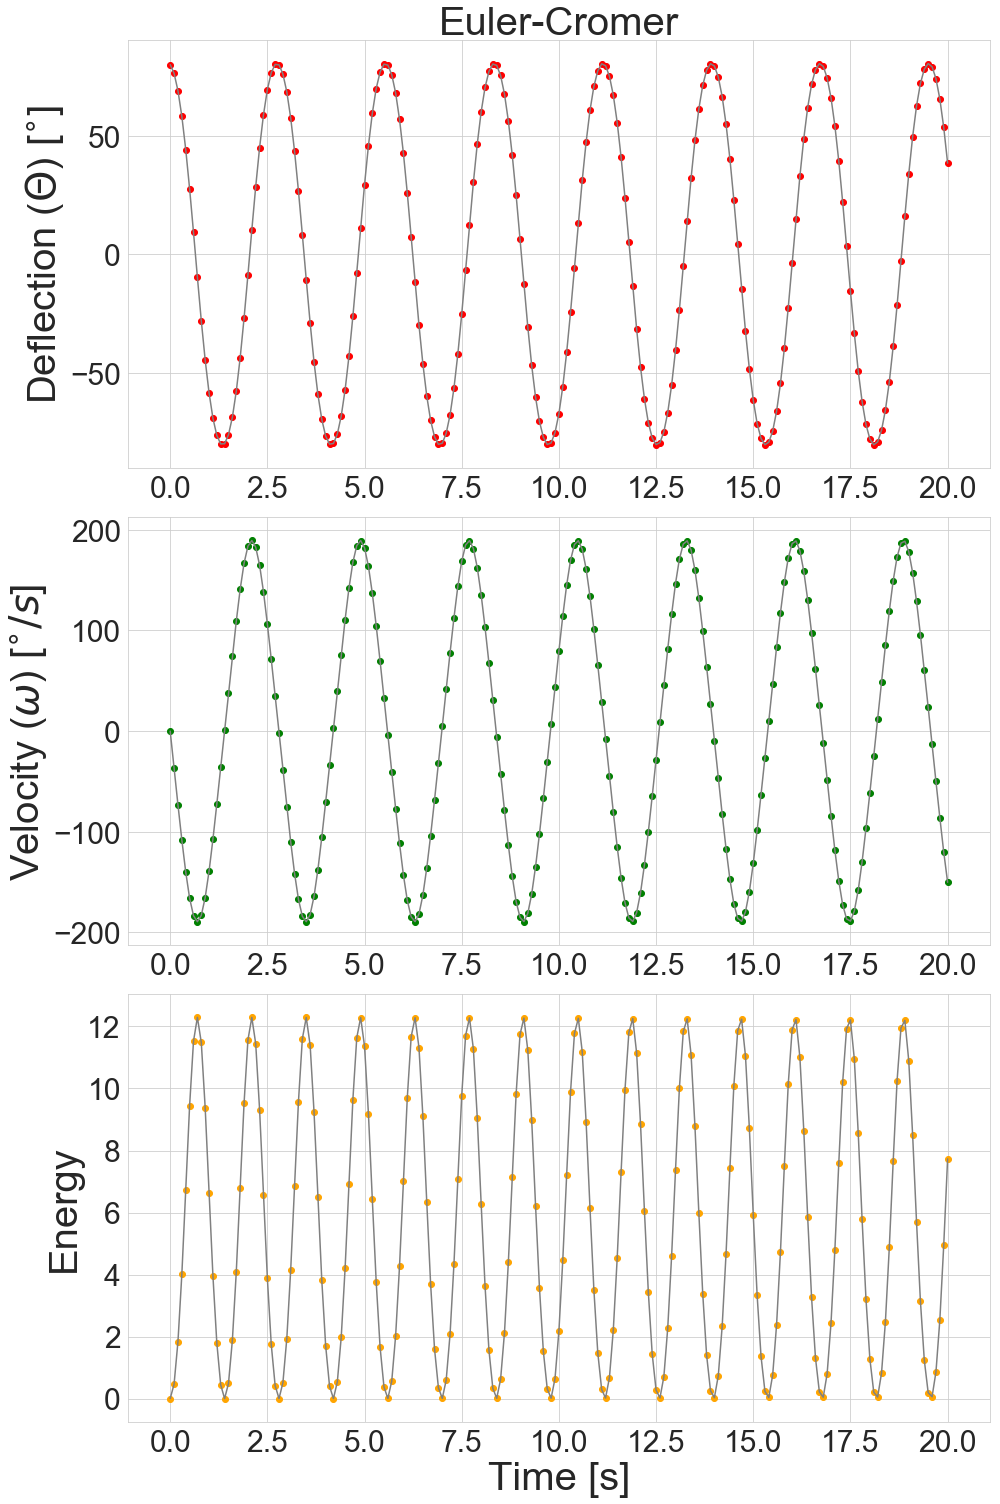

In [147]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_cromer[::steps,0], data_cromer[::steps,1]*180/np.pi, color='grey')
axes[1].plot(data_cromer[::steps,0], data_cromer[::steps,2]*180/np.pi, color='grey')
axes[2].plot(data_cromer[::steps,0], data_cromer[::steps,4], color='grey')

axes[0].scatter(data_cromer[::steps,0], data_cromer[::steps,1]*180/np.pi, color='red')
axes[1].scatter(data_cromer[::steps,0], data_cromer[::steps,2]*180/np.pi, color='green')
axes[2].scatter(data_cromer[::steps,0], data_cromer[::steps,4], color='orange')

axes[0].set_title('Euler-Cromer', fontsize=40)

axes[2].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$^{\circ}$]', fontsize=40)
axes[1].set_ylabel('Velocity ($\omega$) [$^{\circ}/s$]', fontsize=40)
axes[2].set_ylabel('Energy', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_cromer.' + image_format, format=image_format, dpi=image_dpi)
plt.show()